In [7]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2
from collections import defaultdict
from urllib import request
import os
import pandas as pd
import numpy as np
from urllib import request
import cv2
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dropout,Dense
from keras.models import Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os
from tensorflow.keras.applications import VGG16
import json
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import tensorflow
import tensorflow as tf
from collections import deque

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_file_path = 'dataset/training_set'
test_file_path =  'dataset/test_set'


def data_pre_processing(valid_split = 0,input_size = (260, 260),image_color = 'rgb',batch_size = 32,
                        shuffle=True):


    train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)


    test_gen=ImageDataGenerator(rescale=1/255.0)

    train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
    test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
   
    return train_data,test_data
train,test=data_pre_processing()

Found 482 images belonging to 2 classes.
Found 504 images belonging to 2 classes.


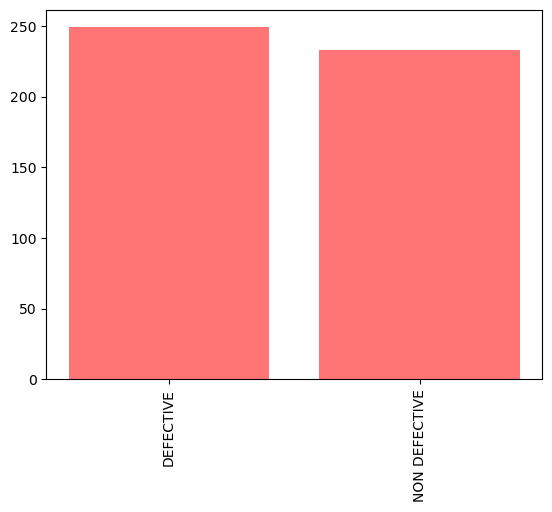

In [13]:
values_counter=Counter(train.classes)
sorted(values_counter.items())
plt.bar(train.class_indices.keys(), values_counter.values(), color=(1, 0.1, 0.1, 0.6))
plt.xticks(rotation=90)
plt.show()

In [14]:
labels=dict()
for label_name,label_num in train.class_indices.items():
        labels[label_num]=label_name

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [02:27<00:00, 16.37s/it]


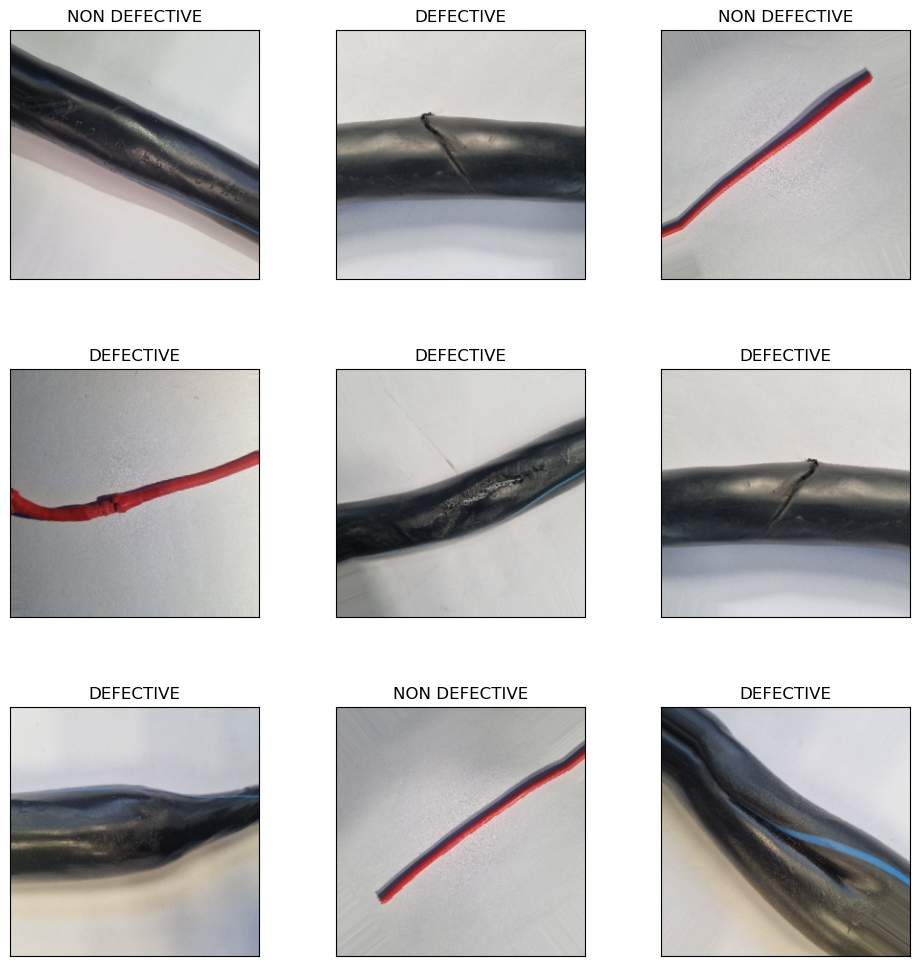

In [15]:
plt.figure(figsize=(10,10))
for i in tqdm(range(9)):
    plt.subplot(3,3,i+1)
    for x_batch,y_batch in train:
        image=x_batch[0]
        argmax=np.argmax(y_batch)
        plt.tight_layout(h_pad=5)
        plt.title(labels[argmax])
        plt.xticks(())
        plt.yticks(())
        plt.imshow(image)
        break


In [9]:
from tensorflow.keras import layers, models


input_shape = ( 260, 260, 3)
n_classes = 2

# Define the model
model = models.Sequential([
    layers.Conv2D(16,(3,3), activation='relu', input_shape=(260, 260, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()




C:\Users\perfect\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 258, 258, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 129, 129, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 127, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 61, 61, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,002 (125.01 KB)

 Trainable params: 32,002 (125.01 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(train,
                    epochs=10)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 233s 8s/step - accuracy: 0.4882 - loss: 0.6908
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 225s 8s/step - accuracy: 0.5757 - loss: 0.6800
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 219s 8s/step - accuracy: 0.7098 - loss: 0.6173
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.6164 - loss: 0.6212
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 225s 7s/step - accuracy: 0.9346 - loss: 0.3804
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.9561 - loss: 0.1412
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.9944 - loss: 0.0378
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 223s 7s/step - accuracy: 0.9012 - loss: 0.1930
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 221s 7s/step - accuracy: 0.9187 - loss: 0.3346
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 221s 8s/step - accuracy: 0.9544 - loss: 0.1187


In [22]:
# Evaluate the model
loss, accuracy = model.evaluate(test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 224s 14s/step - accuracy: 0.9772 - loss: 0.1812
Test Loss: 0.2242838591337204
Test Accuracy: 0.9742063283920288


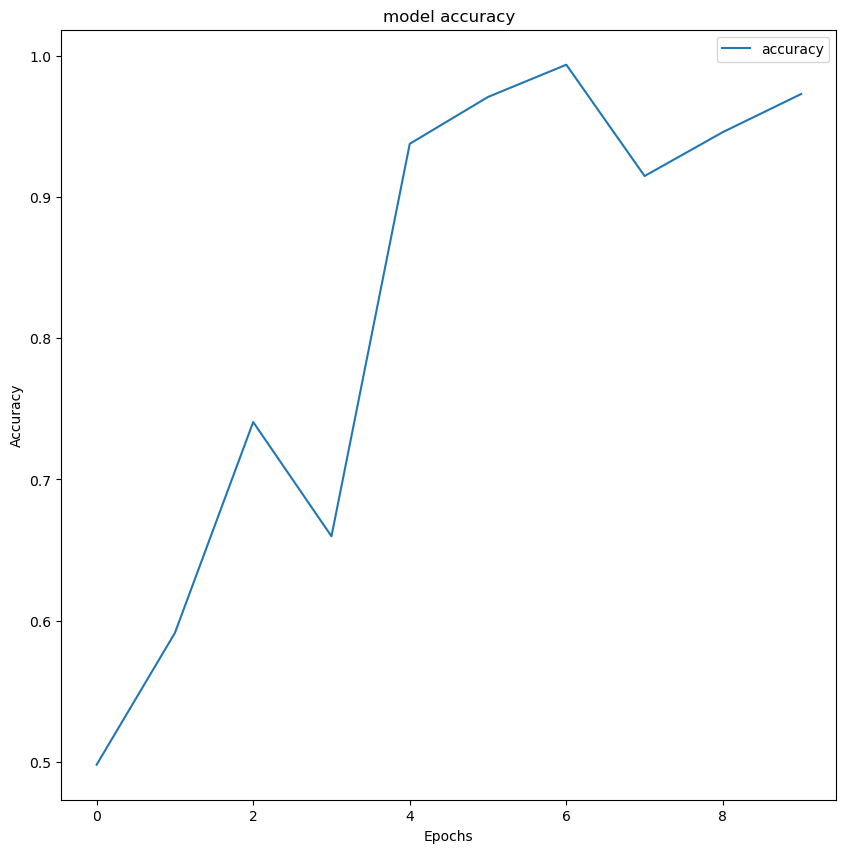

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy"])
plt.show()

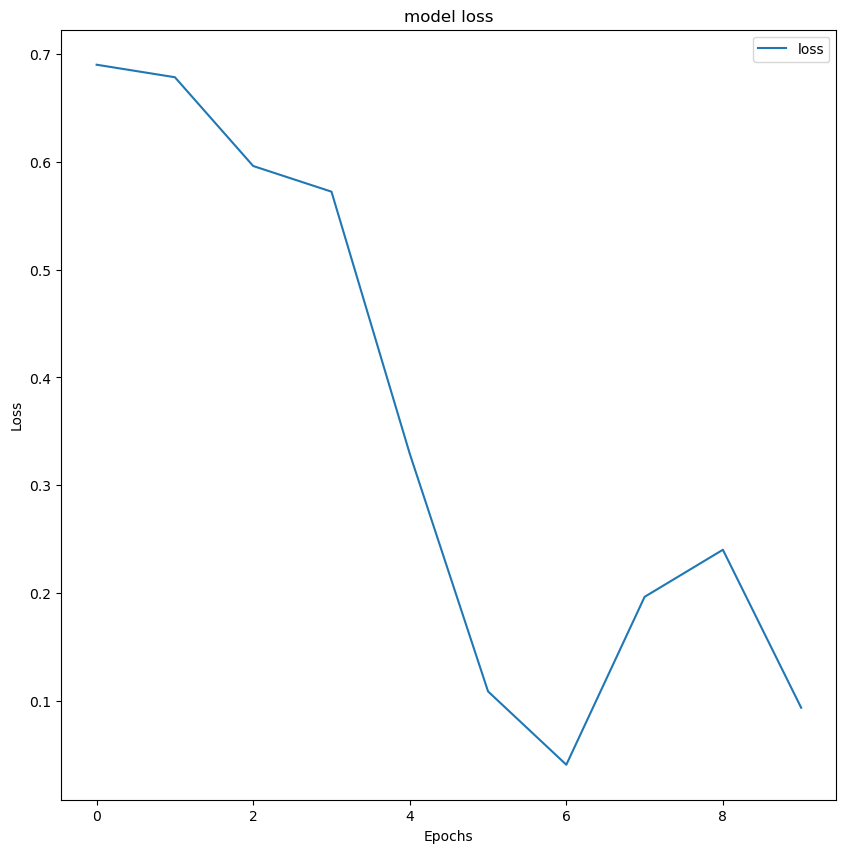

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss"])
plt.show()

In [42]:
model.save('models/model3.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step


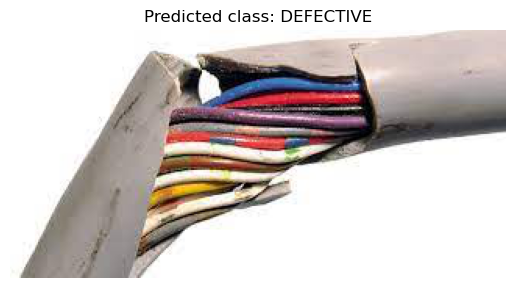

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define paths
model_path = 'models/model3.keras'
test_image_path = 'DEFECTIVE/download.jpeg'

# Load the saved model
model = models.load_model(model_path)

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(260, 260))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.  # Normalize the image:

# Make predictions
predictions = model.predict(test_image)
predicted_class_index = np.argmax(predictions[0])

# Map predicted class index to class labels
class_labels = {0: 'DEFECTIVE', 1: 'NON DEFECTIVE'}  # Update with your actual class labels
predicted_class_label = class_labels[predicted_class_index]

# Visualize the test image, actual class, and predicted class
plt.imshow(image.load_img(test_image_path))
plt.title(f"Predicted class: {predicted_class_label}")
plt.axis('off')
plt.show()
